In [54]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
import numpy as np
import pandas as pd
from scipy.fftpack import fft

In [55]:
outpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\chunking'
figpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\chunking\figures'
source = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final\Raw_NG'

In [56]:
df = pd.read_csv(source + '\Centroids_Final_Sham_2_58256.csv')

In [57]:
#sample data such that there are no NaNs within each path and that each path is greater than 100 frames (fft cannot tolerate NaNs, is removing better than smoothening?) via scatter plot with median cut off. interperlate frames (if its too large cut off, if its too small interperlate) 
def removeNaN(df): 
    if np.any(df.X_position.isnull()):
        a = np.asarray(np.where(df.X_position.isnull())).ravel()
        b = a[1:]
        c = a[:-1]
        d = b-c
        last_chunk = len(df.X_position) - a[-1]


        if last_chunk > 100:

            start = a[-1]+1
            end = a[-1] + last_chunk-1

        elif a[0] > 100:
            start = 0
            end = a[0]-1


        elif d.max() > 100:
            e = d.argmax()
            start = a[e]+1
            end = a[e+1]-1

        else:
            print('error')
    
        time = df.FrameNumber.values[start:end]
        x_no_nan = df.X_position.values[start:end]
        y_no_nan = df.Y_position.values[start:end]
        return(x_no_nan, y_no_nan)
    else:
        x = df.X_position.values
        y = df.Y_position.values
        time = df.FrameNumber.values
        return(x,y, time)

In [58]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

In [59]:
# just making sure the data are read in
x,y, time = removeNaN(df)

In [60]:
#High light
xf, Nx, fftx  = Tortuosity(x,time)
yf, Ny, ffty = Tortuosity(y,time)
sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))

(0, 350)

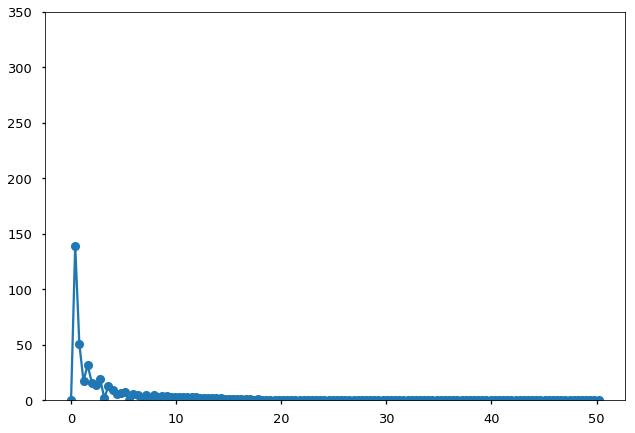

In [65]:
#is the total power of each plot equivilent? if so no need to normalize
plt.plot(xf, 2.0/Nx * np.abs(fftx[0:Nx//2]), "-o")
plt.ylim(0,350)

(0, 350)

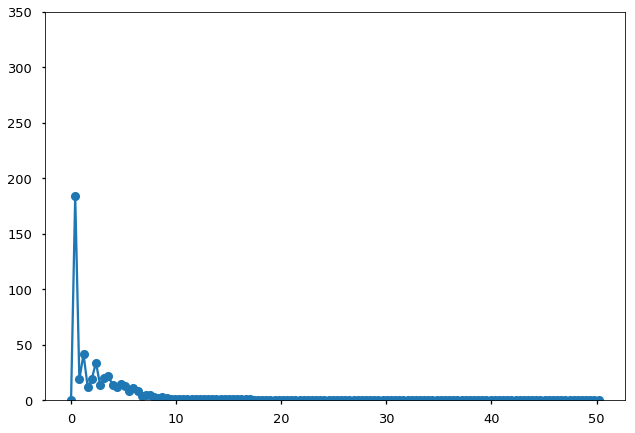

In [23]:
plt.plot(yf, 2.0/Ny * np.abs(ffty[0:Ny//2]), "-o")
plt.ylim(0,350)

(0, 350)

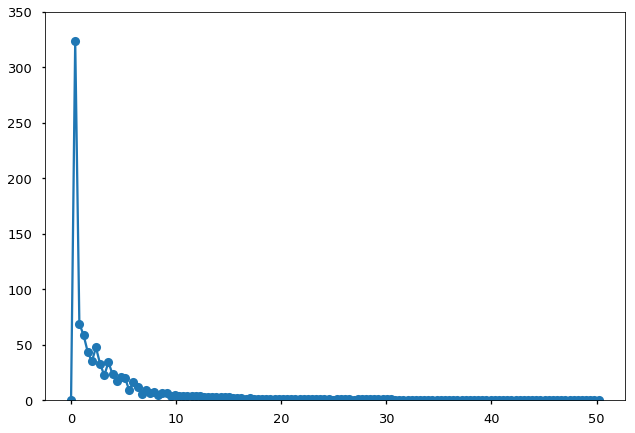

In [27]:
plt.plot(yf, sum_xy, "-o" )
plt.ylim(0,350)